In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")


In [2]:
# Set the ticker symbol for NTPC (NSE)
ticker = 'NTPC.NS'

# Download historical data
ntpc = yf.download(ticker, start='2010-01-01', end='2025-01-01')

# Display first 5 rows
ntpc.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS,NTPC.NS
Date,,,,,
2010-01-04,109.112701,112.430556,108.571494,111.724629,6309685
2010-01-05,107.912605,110.524533,107.371398,110.218637,8199537
2010-01-06,107.394958,110.548094,107.136113,108.383256,8325996
2010-01-07,107.418472,108.147932,106.006619,108.147932,6505911
2010-01-08,108.759720,109.936270,107.865549,108.147920,7441676


In [3]:
print("Summary statistics:")
print(ntpc.describe())

print("\nData Info:")
print(ntpc.info())


Summary statistics:
Price         Close         High          Low         Open        Volume
Ticker      NTPC.NS      NTPC.NS      NTPC.NS      NTPC.NS       NTPC.NS
count   3700.000000  3700.000000  3700.000000  3700.000000  3.700000e+03
mean     115.120979   116.614672   113.747491   115.267016  1.020432e+07
std       74.355226    75.352072    73.449067    74.565070  1.143188e+07
min       57.826401    60.248444    55.404349    56.691066  0.000000e+00
25%       78.720623    79.650343    77.749995    78.790079  3.584980e+06
50%       90.307499    91.396013    89.183594    90.201543  6.850687e+06
75%      102.184553   103.529330   101.187069   102.520723  1.257458e+07
max      437.078278   442.255762   432.739026   439.839587  2.169817e+08

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3700 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, NTPC.

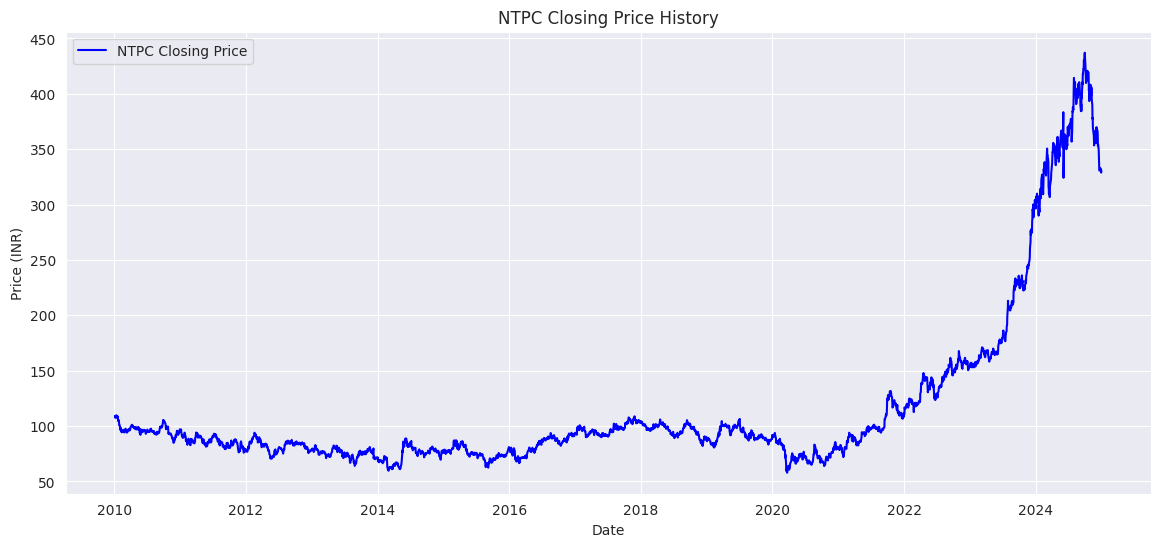

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(ntpc['Close'], label='NTPC Closing Price', color='blue')
plt.title('NTPC Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


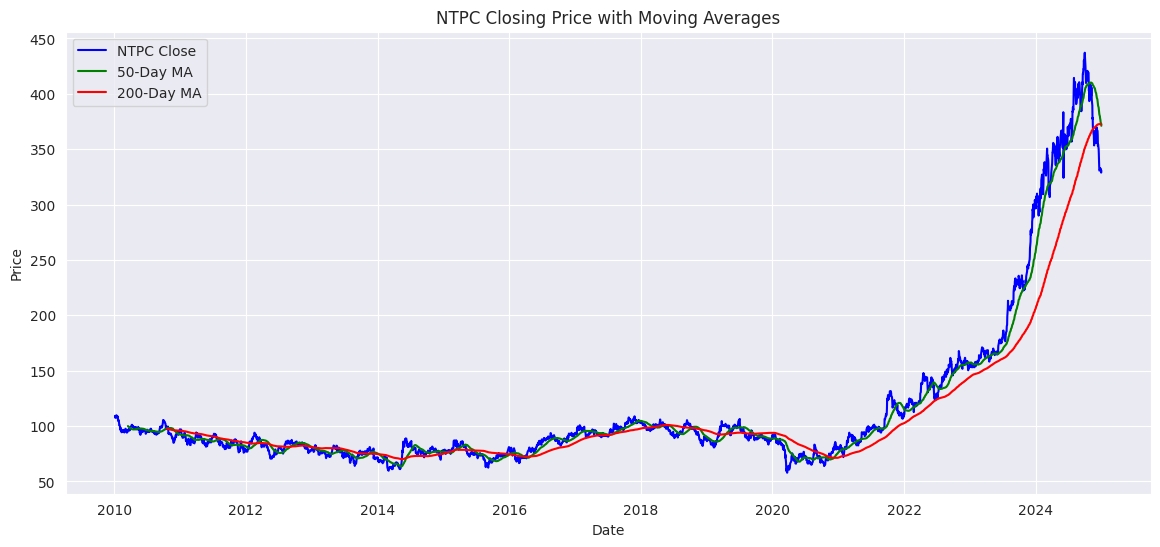

In [5]:
ntpc['MA50'] = ntpc['Close'].rolling(window=50).mean()
ntpc['MA200'] = ntpc['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(ntpc['Close'], label='NTPC Close', color='blue')
plt.plot(ntpc['MA50'], label='50-Day MA', color='green')
plt.plot(ntpc['MA200'], label='200-Day MA', color='red')
plt.title('NTPC Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


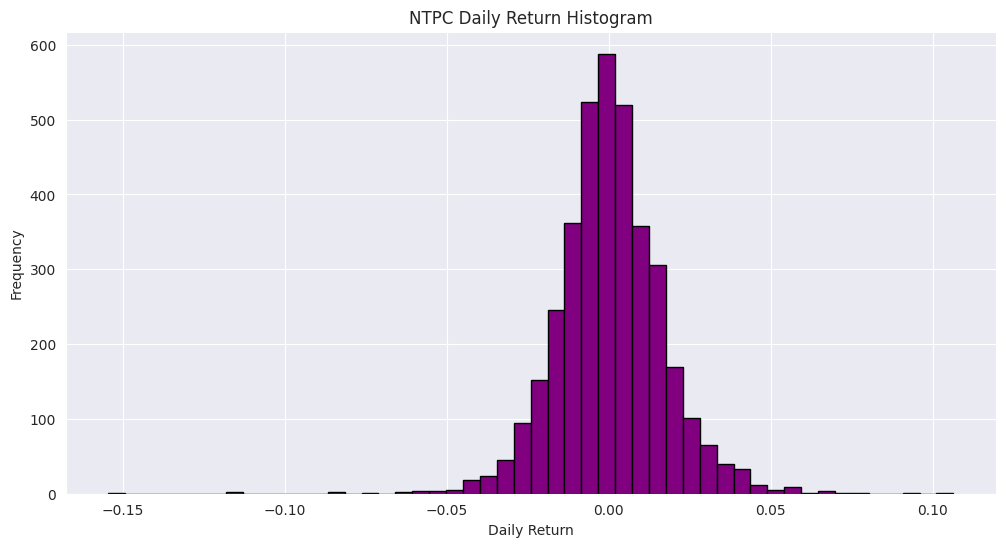

In [6]:
ntpc['Daily Return'] = ntpc['Close'].pct_change()

plt.figure(figsize=(12, 6))
ntpc['Daily Return'].hist(bins=50, color='purple', edgecolor='black')
plt.title('NTPC Daily Return Histogram')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


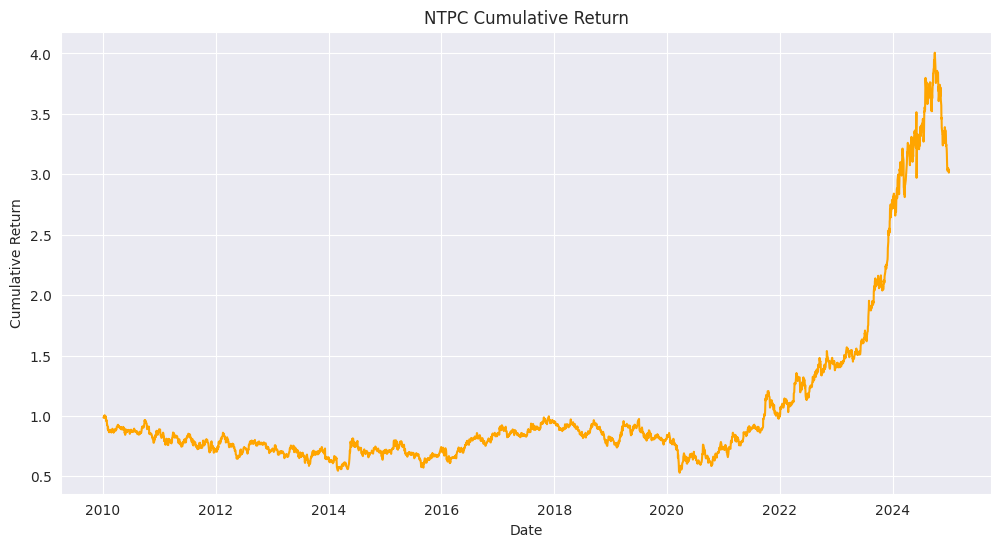

In [7]:
ntpc['Cumulative Return'] = (1 + ntpc['Daily Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(ntpc['Cumulative Return'], color='orange')
plt.title('NTPC Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


[*********************100%***********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BEL']: YFTzMissingError('possibly delisted; no timezone found')
<ipython-input-8-e1fce03bf6b6>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change()


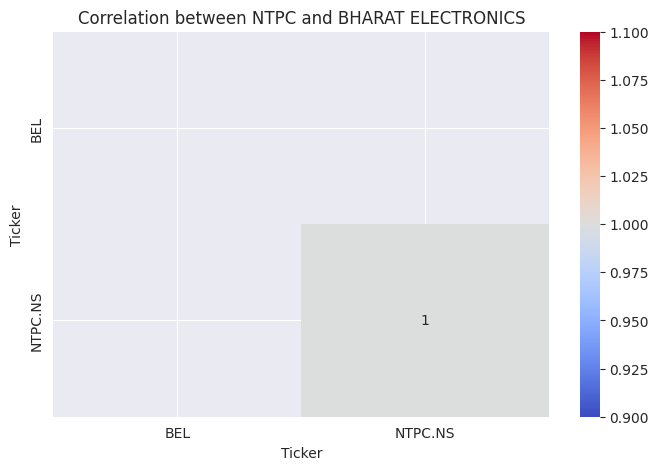

In [8]:
tickers = ['NTPC.NS', 'BEL']
data = yf.download(tickers, start='2015-01-01', end='2025-01-01')['Close']
daily_returns = data.pct_change()

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between NTPC and BHARAT ELECTRONICS')
plt.show()


Monte Carlo Simulation

In [9]:
log_returns = np.log(ntpc['Close'] / ntpc['Close'].shift(1))
log_returns = log_returns.dropna()


In [10]:
# Parameters
last_price = ntpc['Close'].iloc[-1]
num_simulations = 1000
num_days = 252  # 1 year

# Statistics from historical data
mu = log_returns.mean()
sigma = log_returns.std()

print(f"Mean: {mu}, Standard Deviation: {sigma}")


Mean: Ticker
NTPC.NS    0.0003
dtype: float64, Standard Deviation: Ticker
NTPC.NS    0.016632
dtype: float64


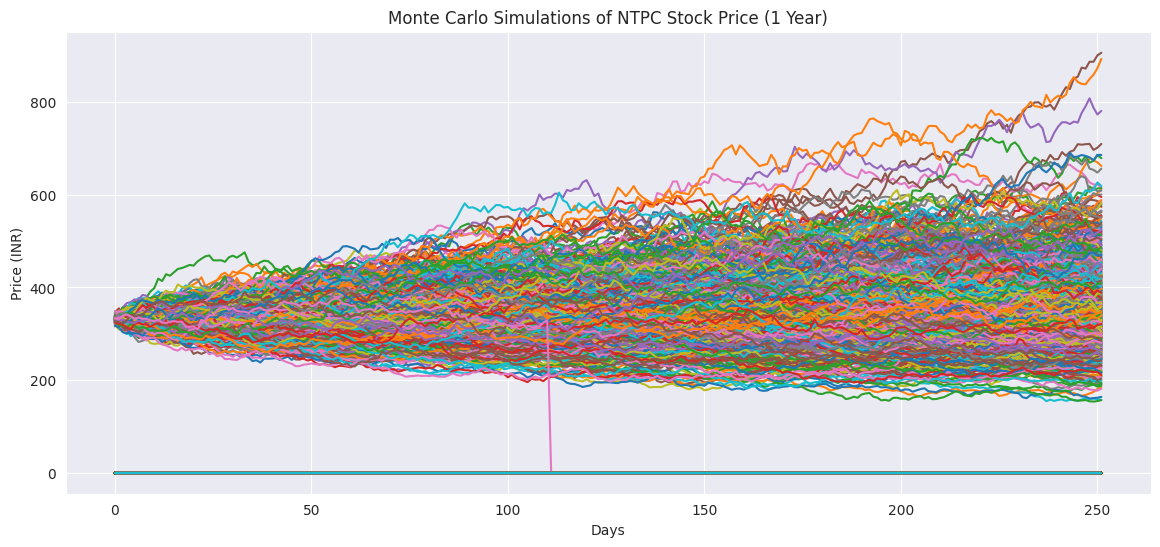

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(simulations)
plt.title('Monte Carlo Simulations of NTPC Stock Price (1 Year)')
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.show()


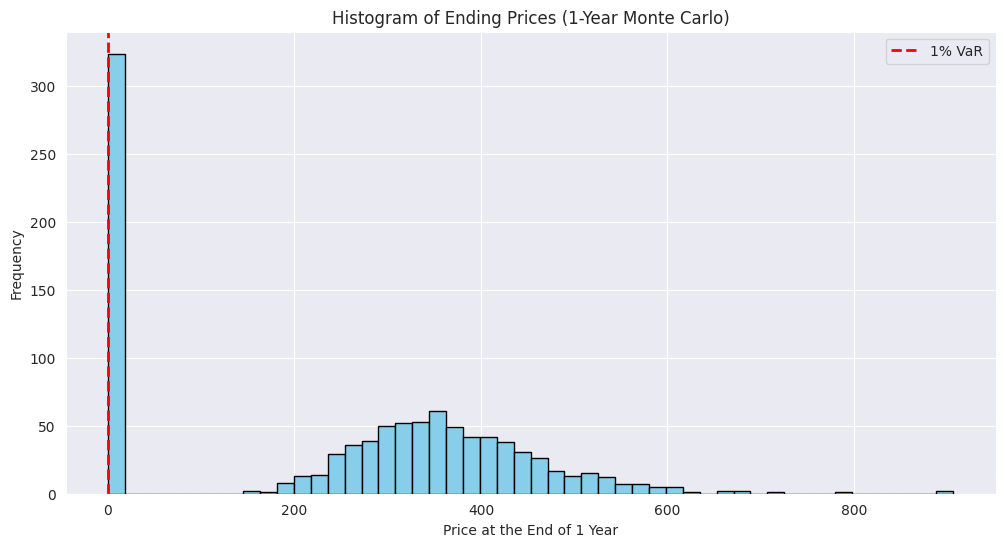

In [13]:
# Ending prices after 1 year
ending_prices = simulations[-1, :]

plt.figure(figsize=(12, 6))
plt.hist(ending_prices, bins=50, color='skyblue', edgecolor='black')
plt.axvline(np.percentile(ending_prices, 1), color='red', linestyle='dashed', linewidth=2, label='1% VaR')
plt.title('Histogram of Ending Prices (1-Year Monte Carlo)')
plt.xlabel('Price at the End of 1 Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()
